# k-Nearest Neighbor (KNN)

Classification and Regression


 - Lazy learner
    
    
    - Instance Based
    - Lazy because it does not tryi to learn a function from the training data
    - It memorizes the patterns from the dataset


 - Nonparametric Model
 
 
     - Distribution-free tests because no assumptions of the data needing to follow a specific distribution
     
 
Used for:
 - Predict if cancer is malignant of benign
 - Pattern recognition
 - Recommender Systems
 - Computer Vision
 - Gene Expression
 - Protein-Protein Interaction and 3D Structure Prediction
 
#### Disadvanteges
 - Not efficient on big data
 - Curse of dimensionality. Very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closesnt neighbors beiung too far away in a high-dimensional space to give a good estimate
 
 
#### Steps:
 - Choose number of $k$
 - Select a distance metric
 - Find the k nearest neighbors of that sample
 - Assign the class label by majority vote

**Demonstration**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

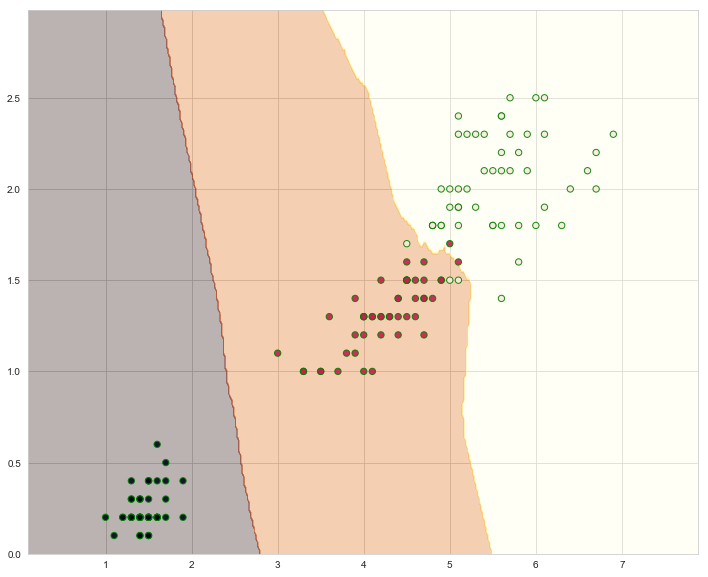

In [9]:
#Try to visualize this
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(12,10))

ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train,
            s=40, alpha=0.9, edgecolors='g');